In [5]:
# import libraries

import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'E:\3 AI 2nd term\Machine learning\project\heart.csv') 
df.shape

(303, 14)

In [7]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Check unique values 
df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

In [9]:
# cp -> Chest Pain type
# trtbps-> resting blood pressure
# chol-> cholestoral
# fbs-> (fasting blood sugar > 120 ) (1 = true; 0 = false)
# restecg-> resting electrocardiographic results 0 .. 2
# thalachh-> maximum heart rate achieved
# exng-> exercise induced angina
# oldpeak -> Previous peak
# any feature contain 0 , 1 , 2 ..
cat_columns = ['sex', 'cp', 'fbs','restecg', 'exng','slp','caa','thall' ]

con_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target_col =['output']

print("The categorial columns are : ", cat_columns)
print("The continuous columns are : ", con_columns)
print("The target column is :  ", target_col)

The categorial columns are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The continuous columns are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target column is :   ['output']


In [10]:

# Get fimiliar with data ... 
# describe categoral columns 
df[cat_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
slp,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0
caa,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
thall,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


In [11]:
# checking null
df.isnull().sum() # .. Great

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [12]:
plt.style.use("ggplot")  #using style ggplot


# Data analysiz Section ############

df.groupby('sex')["output"].count()

sex
0     96
1    207
Name: output, dtype: int64

<AxesSubplot:title={'center':'Male & Female have heart attack'}, ylabel='output'>

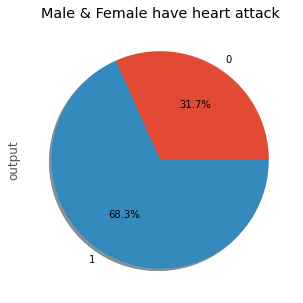

In [13]:
# make groupby and pie graph to see how the percentage [ male and female]
df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="Male & Female have heart attack")

## Gender of the patient
- 1 = 68.3% are male,
- 0 = 31.7% are female

<AxesSubplot:title={'center':'Chest Pain type chest pain type'}, ylabel='output'>

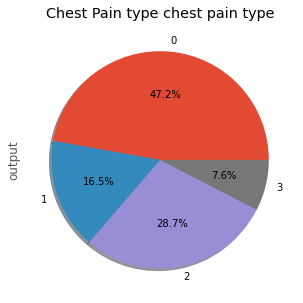

In [14]:
df.groupby('cp')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="Chest Pain type chest pain type")

 ## Chest pain type
 
- 0 : asymptomatic 47.2%

- 1 : typical angina 16.5%

- 2 : atypical angina 28.7 %

- 3 : non-anginal pain 7.6 %

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='output'>

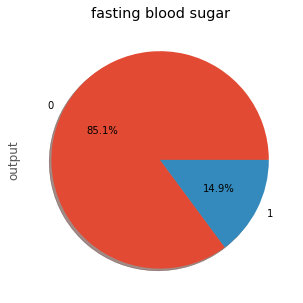

In [15]:
# [ fasting blood sugar]
df.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="fasting blood sugar")

## fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- 0 = 85.1 %

- 1 = 14.9 %

<AxesSubplot:title={'center':'Electrocardiographic results'}, ylabel='output'>

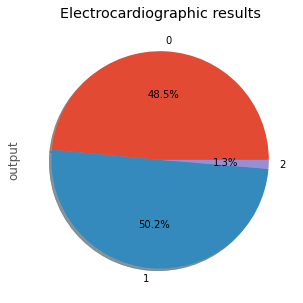

In [16]:
# make groupby and pie graph to see how the percentage [ Electrocardiographic results]

df.groupby('restecg')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True, figsize=(5,5),title="Electrocardiographic results")

## rest_ecg : resting electrocardiographic results

- Value 0: normal = 48.5%

- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) = 50.2 %

- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %

<AxesSubplot:title={'center':'Target Variable - output'}, ylabel='output'>

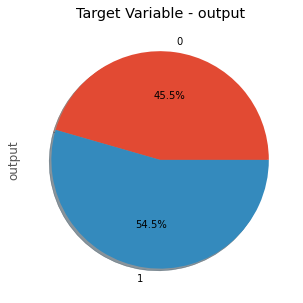

In [17]:
# make groupby and pie graph to see how the percentage [ Target Variable - output]


df.groupby('output')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(5,5),title="Target Variable - output")

## Target Variable - output
- More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent .

<AxesSubplot:title={'center':'Relationship between Age and have patients heart '}, xlabel='age'>

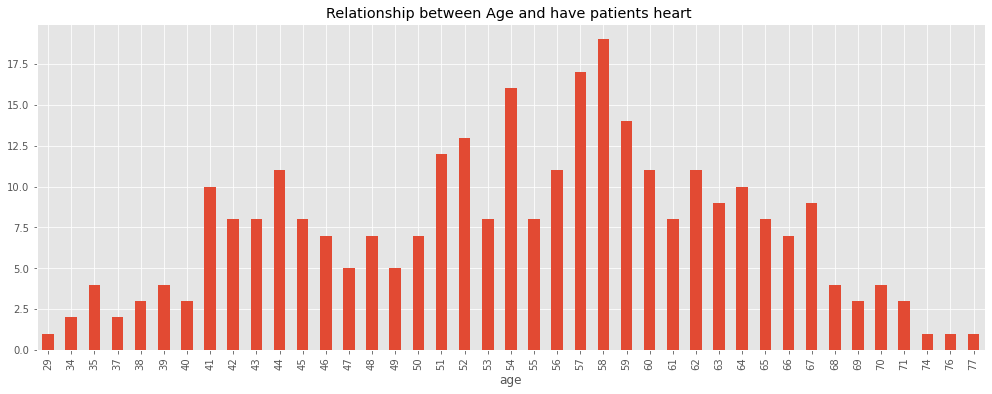

In [18]:
# make groupby and bar graph to see relationship between Age and have patients heart 
df.groupby('age')["output"].count().plot(kind="bar",figsize=(17,6), title="Relationship between Age and have patients heart ")

##  Correlation heat map


In [19]:
# Correlation between features in data set
df_corr = df[con_columns].corr()

df_corr
# 1 means that there is a 1 to 1 relationship (a perfect correlation)
# 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

# -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down
# 0.009403 correlation, which is a very bad correlation because there is no corroleation

# in general from 0.6 or -0.6 is Good correlation

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


<AxesSubplot:>

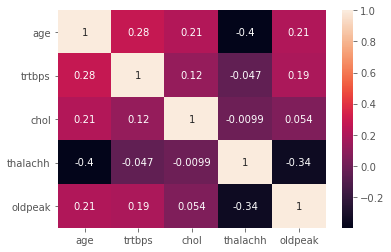

In [20]:
df_corr = df[con_columns].corr().transpose()
sns.heatmap(df_corr, annot =True)

# Lighter shade is positive co-related
# darker shade is negative correlated

## Age Variable
- The vast majority of patients are between 50 and 60

## Analysis results

The vast majority of patients are between 50 and 60.

- Maybe when increasing old years have more chance of heart attack

Gender of the patients

- 68.3% are Male,
- 31.7% are Female

Chest Pain type chest pain type

- Asymptomatic 47.2%
- Typical angina 16.5%
- Atypical angina 28.7 %
- Non-anginal pain 7.6 %

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- 0 = 85.1 %
- 1 = 14.9 %

Resting electrocardiographic results
- Normal = 48.5%
- Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) = 50.2 %
- Showing probable or definite left ventricular hypertrophy by Estes' criteria = 1.3 %

Target Variable - output
- More than half of the patients, 54.5 percent, have a heart attack risk. The remaining 45.5 percent

In [21]:
# Data Pre-processing
df.drop_duplicates(keep='first',inplace=True)

In [22]:
# Splitting Data
# data splitting
from sklearn.model_selection import train_test_split

# X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
#        'exng', 'oldpeak', 'slp', 'caa', 'thall']]

# X = df.drop(['output'],axis=1)
# y = df[['output']]

# X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [23]:
# Scaling input data .. X

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [25]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
MLP = MLPClassifier()
NB=GaussianNB()
SVM=SVC()

In [26]:
li = [LR,DTR,RFR,KNR,MLP,NB,SVM]
d = {}
for i in li:
    i.fit(X_train,y_train) # 80  %
    ypred = i.predict(X_test)
    
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})
    

LogisticRegression() : 86.88524590163934
DecisionTreeClassifier() : 78.68852459016394
RandomForestClassifier() : 90.1639344262295
KNeighborsClassifier() : 91.80327868852459
MLPClassifier() : 88.52459016393442
GaussianNB() : 90.1639344262295
SVC() : 93.44262295081968


C:\Users\future\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
X_test.shape

(61, 13)

In [28]:
SVM.fit(X_train,y_train)

SVC()

In [29]:
row = X_test[0:2]
row

array([[ 0.81328528,  0.70490738,  0.02781503, -0.67462818,  0.65089023,
        -0.40527917, -0.97525383, -1.96657306, -0.6983225 ,  0.27236593,
        -0.61492051,  0.29516791,  1.1478345 ],
       [ 1.03626794,  0.70490738,  1.94307874,  2.19385084, -0.36856884,
        -0.40527917, -0.97525383,  0.23525787, -0.6983225 , -0.39657867,
        -0.61492051, -0.70674006,  1.1478345 ]])

In [30]:
true_labels = y_test[0:2] 
true_labels

array([0, 1], dtype=int64)

In [31]:
SVM.predict(row)

array([0, 0], dtype=int64)

In [32]:
SVM.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [33]:
y_test

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

<AxesSubplot:xlabel='thall', ylabel='count'>

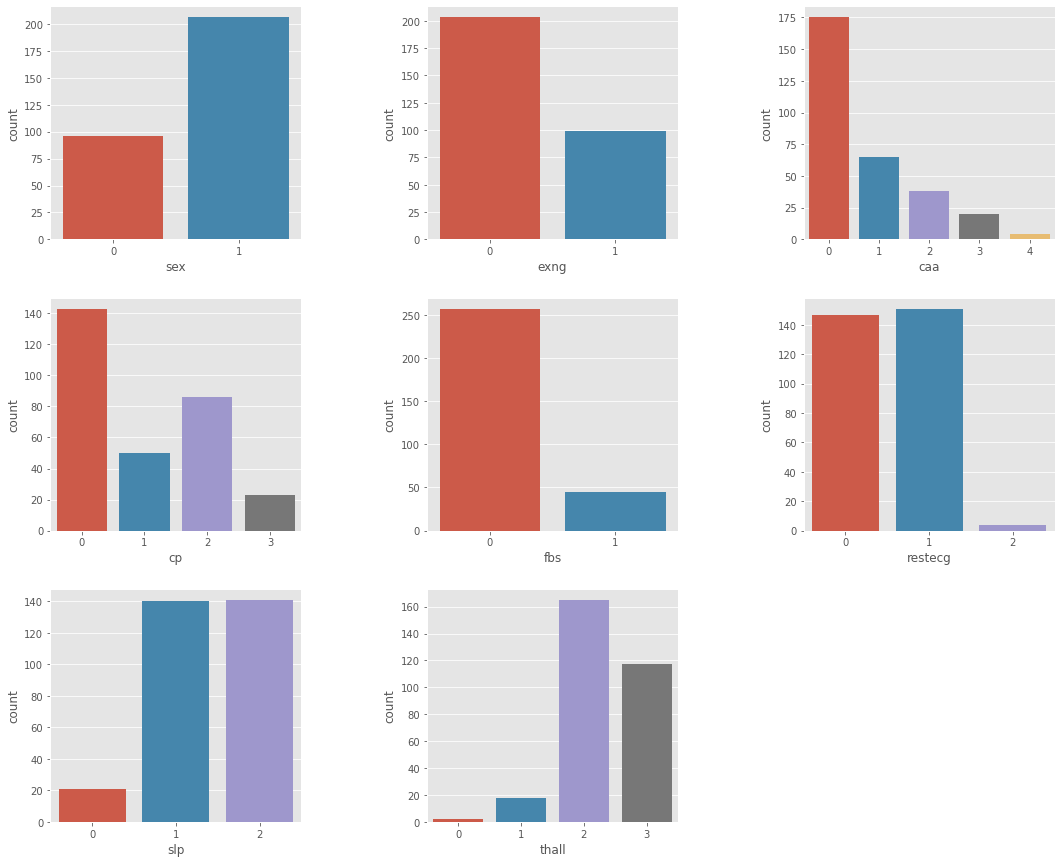

In [34]:
# data visualization
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])


sns.countplot(ax=ax0,x='sex',data = df)
sns.countplot(ax=ax1,x='exng',data = df)
sns.countplot(ax=ax2,x='caa',data = df)
sns.countplot(ax=ax3,x='cp',data = df)
sns.countplot(ax=ax4,x='fbs',data = df)
sns.countplot(ax=ax5,x='restecg',data = df)
sns.countplot(ax=ax6,x='slp',data = df)
sns.countplot(ax=ax7,x='thall',data = df)

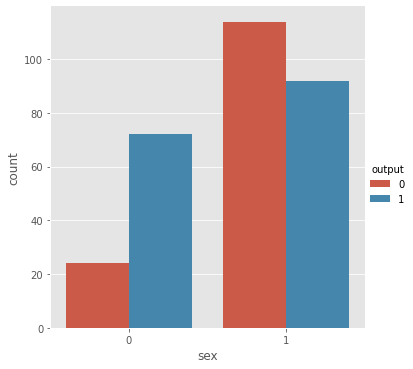

In [35]:
# Comparitve analysiz of categorial data

'''Comparitive Analysis between Heart Attack and Gender
where "output"== Heart Attack'''

sns.catplot(x="sex", hue="output", kind="count", data=df)

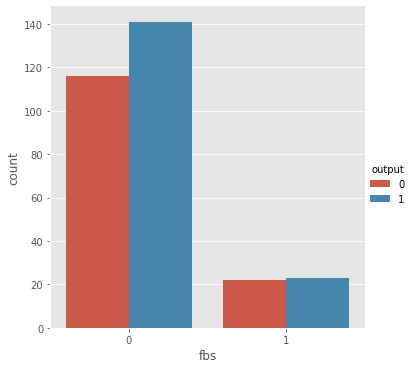

In [36]:
'''Comparitive Analysis between Heart Attack and Fasting Blood Sugar
where "output"== Heart Attack & fbs = fasting blood sugar'''

sns.catplot(x="fbs", hue="output", kind="count", data=df)

# clarify high correlation

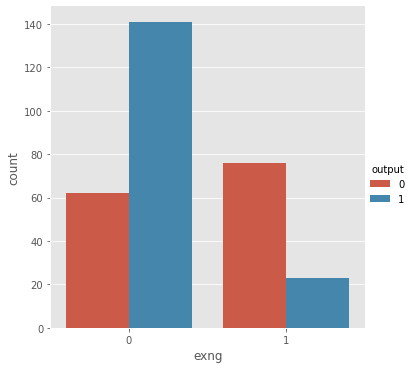

In [37]:
'''Comparitive Analysis between Heart Attack and Exercise induced Angina(exng)
where "output"== Heart Attack'''

sns.catplot(x="exng", hue="output", kind="count", data=df)

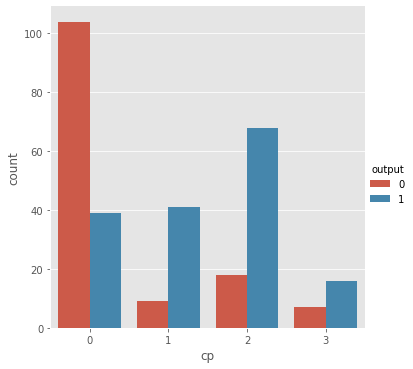

In [38]:
'''Comparitive Analysis between Age and Chest pain type'''

sns.catplot(x="cp", hue="output", kind="count", data=df)


<Figure size 1440x1440 with 0 Axes>

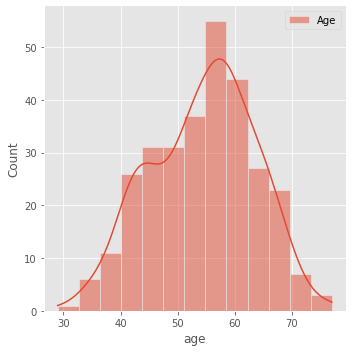

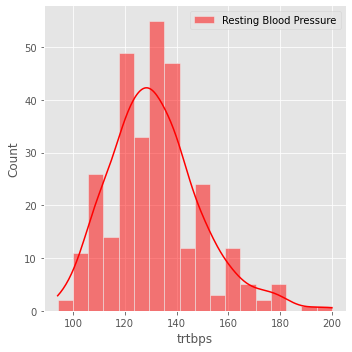

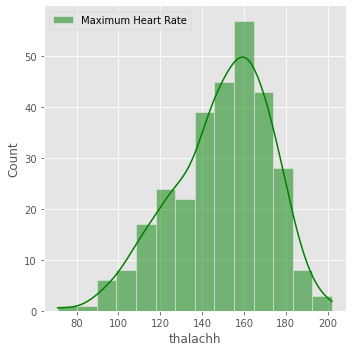

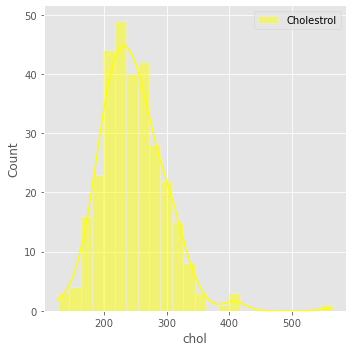

In [39]:
# Visualization continous data
fig = plt.figure(figsize=(20,20))

sns.displot(data= df.age, label="Age", kde= True)
plt.legend()
sns.displot(data= df.trtbps,color="red", label="Resting Blood Pressure", kde= True)
plt.legend()
sns.displot(data= df.thalachh,color="green", label="Maximum Heart Rate", kde= True)
plt.legend()
sns.displot(data= df.chol,color="yellow", label="Cholestrol", kde= True)
plt.legend()

C:\Users\future\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\future\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


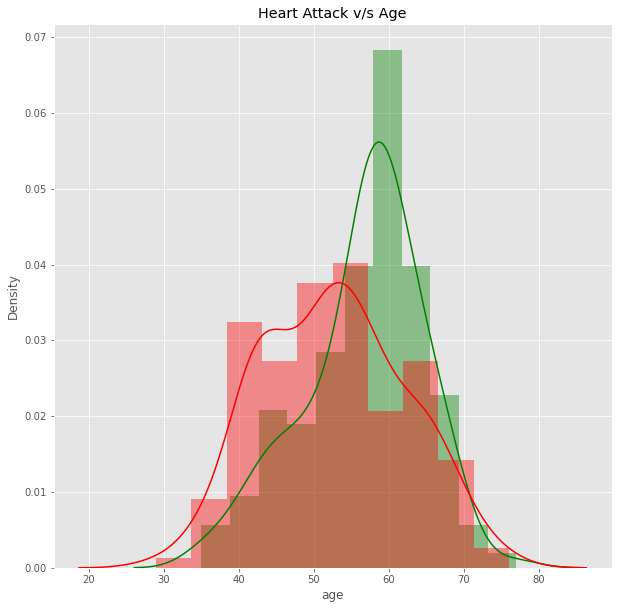

In [40]:
# Comparitive analysis of Continous data
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,) 
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Heart Attack v/s Age')
plt.show()

C:\Users\future\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\future\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


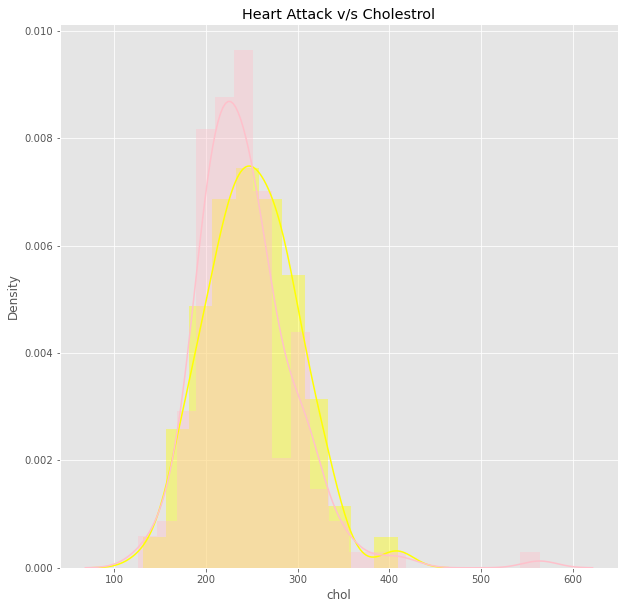

In [41]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["chol"], color='yellow',kde=True,) 
sns.distplot(df[df['output'] == 1]["chol"], color='pink',kde=True)
plt.title('Heart Attack v/s Cholestrol')
plt.show()

C:\Users\future\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\future\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


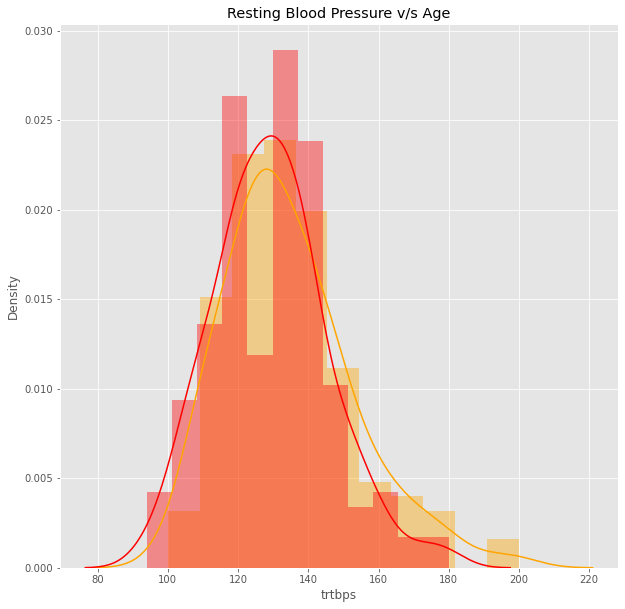

In [42]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["trtbps"], color='orange',kde=True,) 
sns.distplot(df[df['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Resting Blood Pressure v/s Age')
plt.show()

<AxesSubplot:xlabel='output', ylabel='count'>

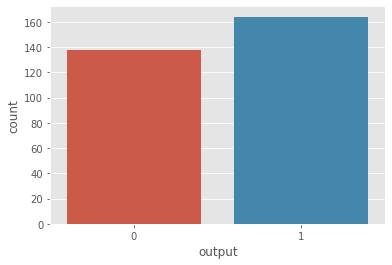

In [43]:
# Visualizing target data
sns.countplot(x='output', data=df)

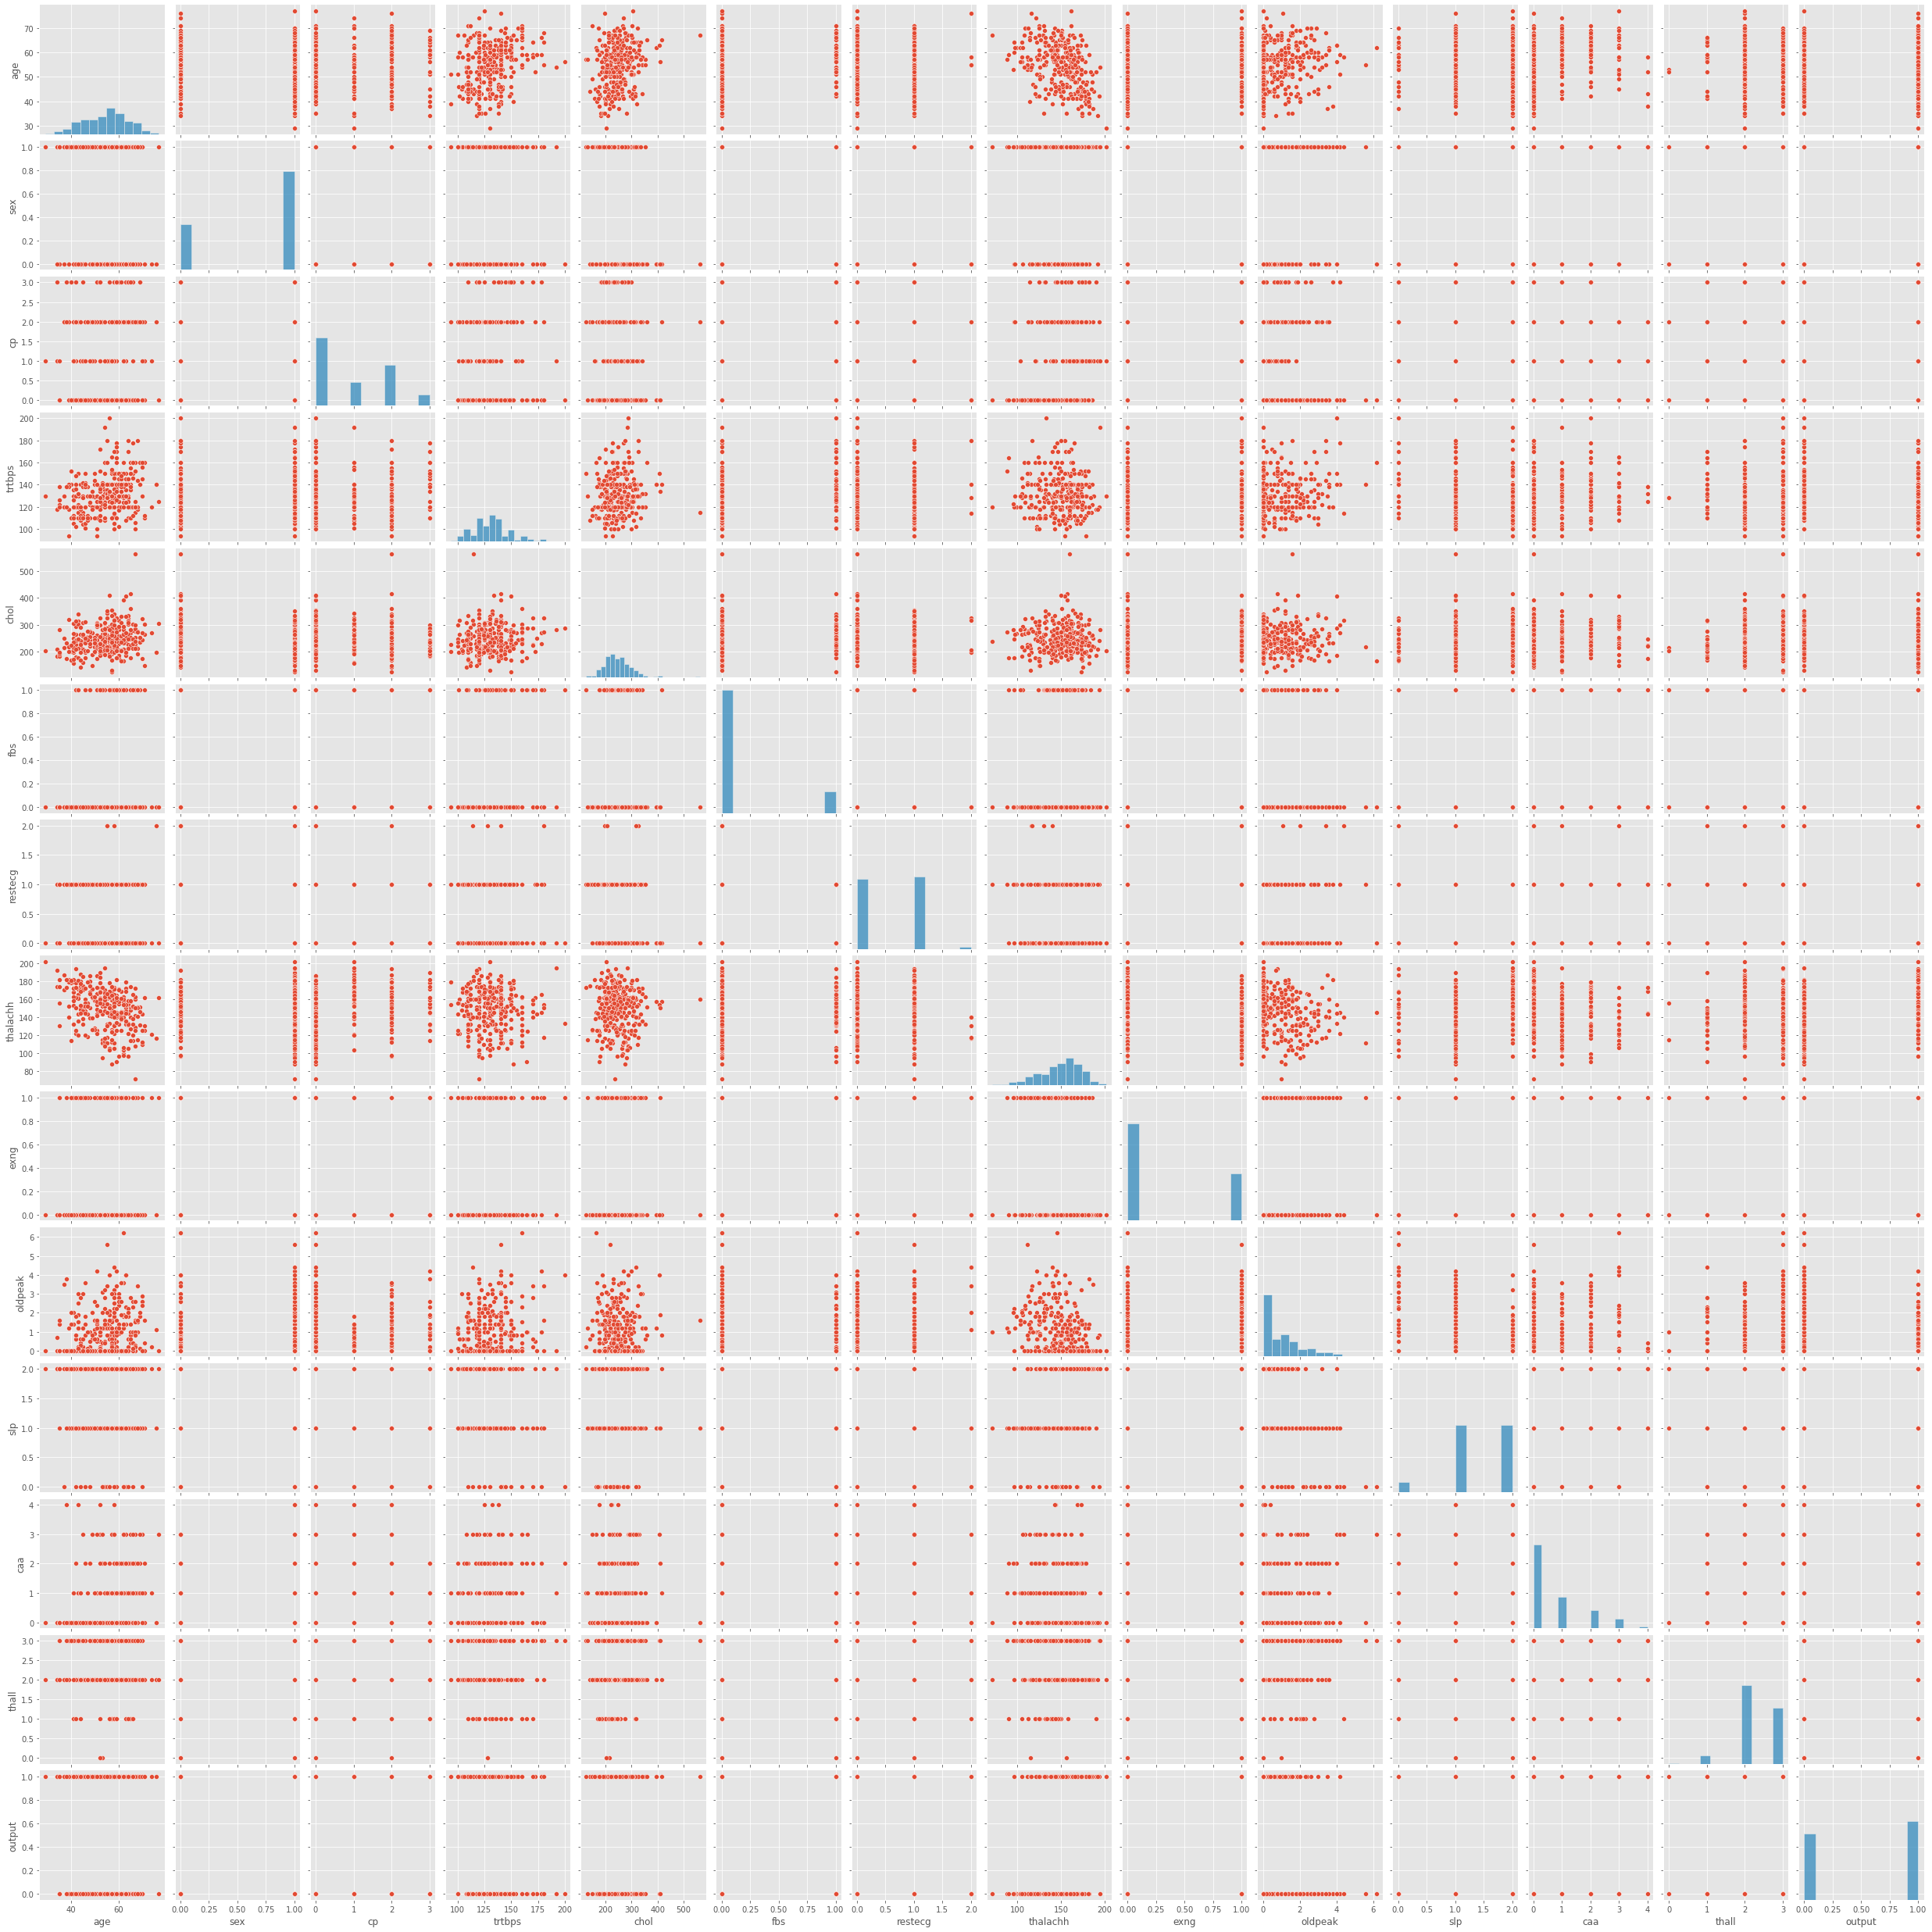

In [44]:
# General distribution
sns.pairplot(df)

In [45]:
# Data Pre-processing
df.drop_duplicates(keep='first',inplace=True)

In [46]:
# data splitting
from sklearn.model_selection import train_test_split

X = df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]
X = df.drop(['output'],axis=1)
y = df[['output']]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [47]:
# Scaling input data .. X

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
# Modeling data
from sklearn import svm
from sklearn.metrics import accuracy_score

model = svm.SVC()
model.fit(X_train, y_train)
  
predicted = model.predict(X_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of SVM is :  93.44262295081968 %


C:\Users\future\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
